In [ ]:
#!/usr/bin/env python
"""choose_skies.ipynb: a notebook to look at detected GW skies """

__author__ = "Chiara M. F. Mingarelli"
__copyright__ = "Copyright 2017, GWASAP project"
__credits__ = ["Chiara Mingarelli"]
__license__ = "GPL"
__version__ = "0.0.1"
__maintainer__ = "Chiara Mingarelli"
__email__ = "mingarelli@gmail.com"
__status__ = "prototype"

In [1]:
from __future__ import division
from IPython.display import display, Math, Latex
import math
from math import sqrt, cos, sin, pi
import numpy as np
import statsmodels.api as sm
from scipy.interpolate import interp1d
import scipy.integrate
import matplotlib.pyplot as plt
import matplotlib.mlab as ml
from matplotlib.ticker import FormatStrFormatter, LinearLocator, NullFormatter, NullLocator, MultipleLocator
import matplotlib.ticker
import matplotlib.colors
from matplotlib.font_manager import FontProperties
from matplotlib import rc, text
import healpy as hp
import plot_mpl2
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.io import fits
import collections
from collections import Counter


%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
det_sky = np.genfromtxt("../detectedSkies/detected_skiesMM13.txt")

In [3]:
def find_nearest(array,value):
    #returns index of matching value in array
    idx = (np.abs(array-value)).argmin()
    return idx 

In [4]:
def find_gal_idx(nameList, name):
    ans = [i for i, x in enumerate(nameList) if x == name]
    return ans

def find_gal_dec_idx(nameList, dec):
    ans = [i for i, x in enumerate(nameList) if x >= dec]
    return ans

def find_gal_dec_idx_neg(nameList, dec):
    ans = [i for i, x in enumerate(nameList) if x <= dec]
    return ans

In [5]:
det_DEC = det_sky[:,1]*180/pi

In [37]:
det_name = np.genfromtxt("../detectedSkies/detected_skiesMM13.txt", usecols = (6))
det_file = np.genfromtxt("../detectedSkies/detected_skiesMM13.txt", usecols = (4), dtype=None)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  


In [38]:
det_name = det_name.tolist()

In [39]:
len(det_name)

106

In [40]:
det_name

[0.45456941231342607,
 0.5159878792886623,
 0.6328203825812017,
 0.4636082663603938,
 0.8019233808874565,
 0.5119968507145632,
 0.6307180006816622,
 0.5407458542220357,
 0.5343360144831508,
 0.517133876709962,
 0.9886945051571424,
 0.7109902003666003,
 0.3973641726993507,
 0.3464920554123951,
 0.6668726081625214,
 0.284724299252636,
 0.5627765526073517,
 0.37478024733523607,
 0.4490565352776331,
 0.45938496812522517,
 0.3390777296591604,
 0.28088151864931754,
 0.3709544269664176,
 0.3803293191875677,
 0.42730990704106026,
 0.7281504432319194,
 0.37239742001618686,
 0.3198064750635687,
 0.8922791992603963,
 0.9745394942361303,
 0.6504345937593309,
 0.77010369555028,
 0.5742854709278247,
 0.4332761325876393,
 0.5765194109562781,
 0.27548162656753583,
 0.49868449051495856,
 0.8955017481208266,
 0.27236717045907455,
 0.587983171318765,
 0.306521210159265,
 0.4148167654692882,
 0.947359824601927,
 0.36412570675494477,
 0.8439041365906562,
 0.3710573122117983,
 0.36910736311245856,
 0.515272

In [41]:
rm_dec_pos = find_gal_dec_idx(det_DEC, 70.0)
rm_dec_neg = find_gal_dec_idx_neg(det_DEC, -70.0)

In [11]:
# concatenate ±70 deg in declination galaxy indices
all_bad_idx = rm_dec_neg + rm_dec_pos 

In [12]:
new_det_sky = np.delete(det_sky, all_bad_idx ,0)

In [13]:
new_det_sky_name = np.delete(det_name, all_bad_idx,0)
new_det_sky_file= np.delete(det_file, all_bad_idx,0)

In [14]:
new_det_sky.shape

(24, 15)

In [15]:
# Parameters of detected skies once the list has had the bad galaxies removed
det_RA = new_det_sky[:,0]*180/pi
det_DEC = new_det_sky[:,1]*180/pi
det_freq = new_det_sky[:,2]
det_strain = new_det_sky[:,3]
mchirp_rec = new_det_sky[:,5]
q_rec = new_det_sky[:,6]
det_name = new_det_sky_name
det_dist = new_det_sky[:,8]
mstar_list = new_det_sky[:,9]
save_p= new_det_sky[:,10]
det_file = new_det_sky_file

In [16]:
# load pulsar positions on the sky

In [17]:
p_pos = np.genfromtxt("pulsar_positions.txt", skip_header=0, usecols = (1,2) )
p_RA = p_pos[:,0]
p_DEC = pi/2-p_pos[:,1]
p_name = np.genfromtxt("pulsar_positions.txt", skip_header=0, usecols = (0), dtype = 'S13' )

In [18]:
Mp_pos = np.genfromtxt("more_pulsars.txt", usecols = (1,2) )
Mp_RA = Mp_pos[:,0]
Mp_DEC = Mp_pos[:,1]
Mp_name = np.genfromtxt("more_pulsars.txt", usecols = (0), dtype = 'S13' )

In [19]:
# Make maps of all the detected sources

/anaconda3/lib/python3.6/site-packages/matplotlib/projections/geo.py:426: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))


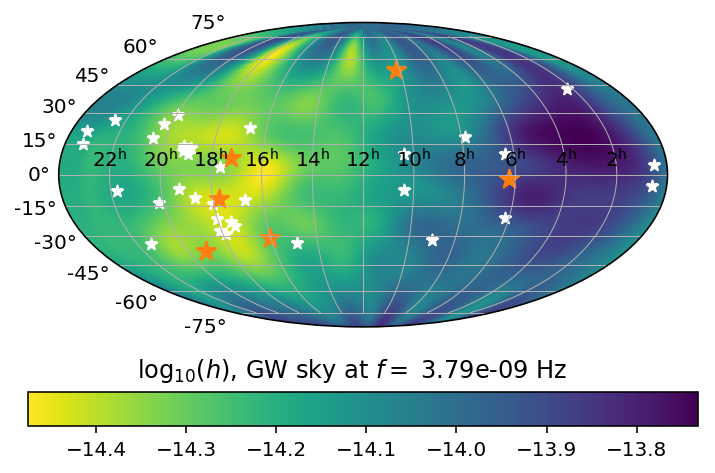

In [20]:
# To plot a single sky here, set up for multiple detected skies 
det_freq = []
det_freq.append(3.78653726523e-09)
#for ii in range(len(det_RA)):
for ii in range(1):
    scat_sky=np.genfromtxt("../scatter_maps/scatterData_freq_"+str(det_freq[ii])+"Hz.dat")
    scat_ra = scat_sky[:,0]
    scat_dec = scat_sky[:,1]
    scat_strain = np.log10(scat_sky[:,2])
    #look_up_freq = det_freq[ii]
    ax = plt.subplot(111, projection='astro mollweide')
    colors = scat_strain
    sky=plt.scatter(scat_ra, scat_dec, c = colors, edgecolors='none', cmap ='viridis_r',  rasterized=True)
    #plt.suptitle(str(det_name[ii])+", GW sky at $f=$ "+str('%.2e' %det_freq[ii])+" Hz, $h=$"+str('%.2e'%det_strain[ii]),\
    #             y=0.3)
    plt.suptitle(r"$\log_{10}(h)$, GW sky at $f=$ "+str('%.2e' %det_freq[ii])+" Hz", y=0.3)
    plt.scatter(Mp_RA*pi/180, Mp_DEC*pi/180, color ='white', marker = "*", alpha=1)
    plt.scatter(p_RA, p_DEC, marker = "*", color = '#ff7f0e', s = 100)
    plt.colorbar(sky, orientation = 'horizontal')
    ax.grid(linewidth=0.5)
    #ax.set_axisbelow(True)
    #plt.savefig("../detectedSkies/hercules_skies/log_detected_sky_"+str(ii)+"_"+str(det_name[ii])+"_wPulsars.pdf", dpi=400)
    #plt.savefig("../detectedSkies/hercules_skies/log_detected_sky_"+str(ii)+"_wPulsars.pdf", dpi=400)
    #plt.clf()
    #plt.savefig("allEPTA_pulsars.pdf", dpi=400)

## Visually inspect resultant GW skies. Are the sources lying on e.g. interpolation flares?

In [21]:
# indices of skies which failed 2nd inspection, you need to put these in by hand
sec_insp_idx = [0,2,4,6,8, 9,10,16,19,21, 28,33,34,41, 44,49,50,53,56,57,61,65,66,70,72,76,80,89,93,108,109,114,\
               120, 131,134,139,140,142,143,144,147,148,151,159,164,166,175,]

In [22]:
final_sky = np.delete(new_det_sky, sec_insp_idx,0)
final_sky_name = np.delete(new_det_sky_name, sec_insp_idx,0)
final_sky_file = np.delete(new_det_sky_file, sec_insp_idx,0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
final_sky_file

array([b'mm13reg_1150_test', b'mm13reg_8218_test', b'mm13reg_3462_test',
       b'mm13reg_3977_test', b'mm13reg_2189_test', b'mm13reg_8674_test',
       b'mm13reg_1639_test', b'mm13reg_5842_test', b'mm13reg_203_test',
       b'mm13reg_7170_test', b'mm13reg_4008_test', b'mm13reg_2476_test',
       b'mm13reg_3047_test', b'mm13reg_2791_test'], dtype='|S17')

In [24]:
# final galaxy list and parameters

det_RA = final_sky[:,0]*180/pi
det_DEC = final_sky[:,1]*180/pi
det_freq = final_sky[:,2]
det_strain = final_sky[:,3]
mchirp_rec = final_sky[:,5]
q_rec = final_sky[:,6]
det_name = final_sky_name
det_dist = final_sky[:,7]
mstar_list = final_sky[:,8]
save_p= final_sky[:,9]
det_file = final_sky_file

In [25]:
def hist_weight(lst):
    return np.ones_like(lst)/len(lst)

def auto_bin(bin_size, min_edge, max_edge):
    #bin_size = 0.05; min_edge = -3.5; max_edge = -1
    N = (max_edge-min_edge)/bin_size; Nplus1 = N + 1
    bin_list = np.linspace(min_edge, max_edge, Nplus1)
    return bin_list

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys
No handles with labels found to put in legend.


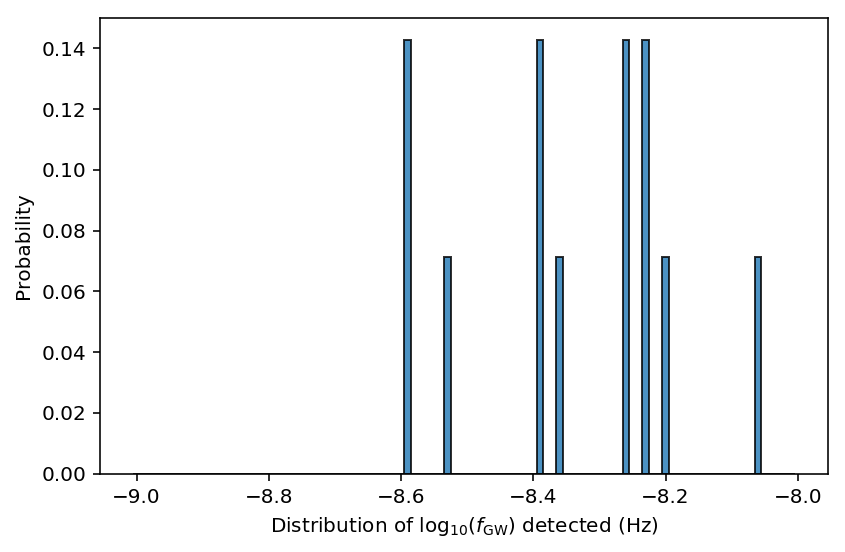

In [26]:
# What is the distribution of frequencies where sources were detected?
#bin_size = 0.1; min_edge = -9.0; max_edge = -8
bin_list = auto_bin(0.01,-9,-8)
weights = hist_weight(np.log10(det_freq))
plt.hist(np.log10(det_freq),bin_list, align='left',  alpha=0.8, edgecolor = 'black', weights = weights)
plt.xlabel(r"Distribution of $\log_{10}(f_\mathrm{GW})$ detected (Hz)")
plt.ylabel("Probability")
plt.legend(frameon=False)
plt.tight_layout()
#plt.savefig("det_gw_freqs_3Mar17.pdf")

In [27]:
det_dist = det_dist.tolist()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys
No handles with labels found to put in legend.


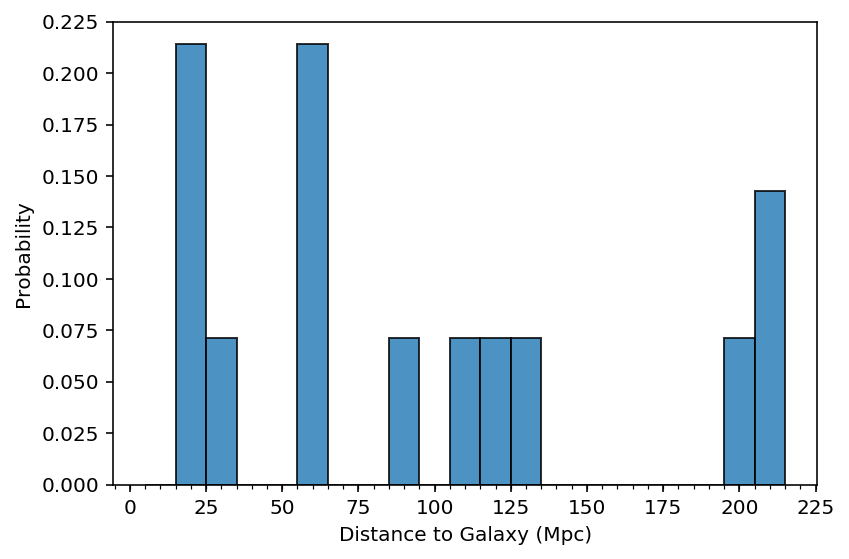

In [28]:
fig = plt.figure()

bin_list = auto_bin(10,10,220)
weights = hist_weight(det_dist)
ax = fig.add_subplot(111)
plt.hist(det_dist, bin_list, weights=weights, alpha = 0.8, align='left', edgecolor = 'black')
majorLocator = MultipleLocator(25)
minorLocator = MultipleLocator(5)
ax.xaxis.set_minor_locator(minorLocator)
ax.xaxis.set_major_locator(majorLocator)
plt.xlabel("Distance to Galaxy (Mpc)")
plt.ylabel("Probability")
plt.legend(frameon=False)
plt.tight_layout()
#plt.savefig("distance_to_detected_gals_3Mar17_10bins.pdf")

In [69]:
catalog_list = gal_name

In [70]:
len(catalog_list)
catalog_list

['PGC017787',
 'NGC5357',
 'PGC053829',
 'NGC5078',
 'NGC2892',
 'NGC4382',
 'ESO057-068',
 'NGC5413',
 'NGC4125',
 'UGC09518',
 'PGC047626',
 'NGC5044',
 'NGC4789',
 'NGC5011']

In [71]:
histo_data = dict((x, catalog_list.count(x)) for x in catalog_list)

In [73]:
d= histo_data
print(d)
print(d.values())

{'PGC017787': 1, 'NGC5357': 1, 'PGC053829': 1, 'NGC5078': 1, 'NGC2892': 1, 'NGC4382': 1, 'ESO057-068': 1, 'NGC5413': 1, 'NGC4125': 1, 'UGC09518': 1, 'PGC047626': 1, 'NGC5044': 1, 'NGC4789': 1, 'NGC5011': 1}
dict_values([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_

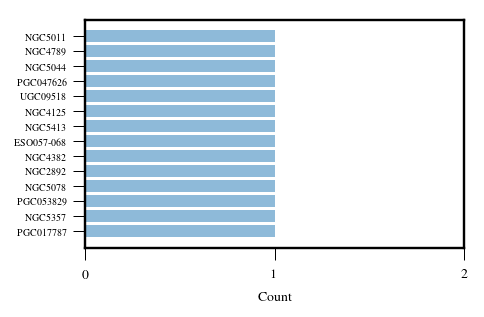

In [75]:
X = np.arange(len(d))
fig = plt.figure()
ax = fig.add_subplot(111)
values = list(d.values())
ax.barh(X, values, alpha=0.5, linewidth = 0.5)
ax.set_yticks(X)
#ax.set_yticklabels(large_label)
plt.setp(ax.get_yticklabels(), fontsize=5)
ax.set_yticklabels(d.keys())
majorLocator = MultipleLocator(1)
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
ax.xaxis.set_major_locator(majorLocator)
xmax = max(d.values()) + 1
plt.xlim(0, xmax)
plt.xlabel("Count")

#plt.savefig("64k_galaxy_count_revised_1Feb17.pdf", bbox_inches='tight')
plt.show()

In [ ]:
# try using a sorted list

In [76]:
histo_data = sorted(histo_data.items(), key=lambda x:x[1]) # sort histogram by count

In [77]:
value = np.zeros([len(histo_data)])
label = []

In [78]:
for j in range(len(histo_data)):
    value[j] = histo_data[j][1]
    label.append(histo_data[j][0])

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_

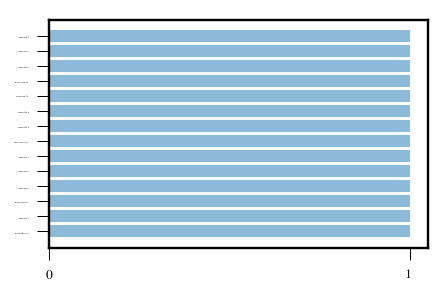

In [79]:
X = np.arange(len(value))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.barh(X, value, alpha=0.5, linewidth = 0.4)
ax.set_yticks(X)
plt.setp(ax.get_yticklabels(), fontsize=1.5)
ax.set_yticklabels(label)
majorLocator = MultipleLocator(1)
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
ax.xaxis.set_major_locator(majorLocator)
#plt.xticks(np.arange(0,4, 1))

#plt.savefig("sorted_75k_galaxies_3Mar17.pdf")

In [80]:
# Make LaTex tables for paper by adding  & and \\
det_nameR = []
det_distR = []
mstar_listR = []
mchirp_recR = []
q_recR = []
det_freqR = []
det_strainR = []

In [81]:
# final galaxy list and parameters

det_RA = final_sky[:,0]*180/pi
det_DEC = final_sky[:,1]*180/pi
det_freq = final_sky[:,2]
det_strain = final_sky[:,3]
mchirp_rec = final_sky[:,5]
q_rec = final_sky[:,6]
det_name = final_sky_name
det_dist = final_sky[:,8]
mstar_list = final_sky[:,9]
save_p= final_sky[:,10]
det_file = final_sky_file

In [82]:
# 34 detected galaxies; add "&" and slashes for latex table 
for ii in range(34):
    det_nameR.append(str(det_name[ii])+str(" & "))
    det_distR.append(str(det_dist[ii])+str(" & "))
    mstar_listR.append(str("%.2f" %mstar_list[ii])+str(" & "))
    mchirp_recR.append(str('%.2e'%mchirp_rec[ii])+str(" & "))
    q_recR.append(str("%.2f" %q_rec[ii])+str(" & "))
    det_freqR.append(str("%.2e" %det_freq[ii])+str(" & "))
    det_strainR.append(str("%.2e" %det_strain[ii])+str(" \\\ "))

IndexError: index 14 is out of bounds for axis 0 with size 14

In [30]:
gal_name = []

In [51]:
for ii in range(len(final_sky_file)):
    sky_q = np.genfromtxt("../rusty_data/MM13_Reg/test01/"+str(str(final_sky_file[ii]))[2:-1], usecols = 5)
    #for qdet in sky_q:
    index = find_nearest(sky_q, q_rec[ii])
    print(sky_q[index])
    gal_name.append(np.genfromtxt("../rusty_data/MM13_Reg/test01/"+str(str(final_sky_file[ii]))[2:-1], usecols = 6, dtype='str')[index])

0.3464920554123951
0.3709544269664176
0.3198064750635687
0.947359824601927
0.3468766175179762
0.35230551883069416
0.490999941904496
0.9884203640112285
0.6489931945380798
0.28726220350498205
0.47956157015468487
0.7409835925540902
0.35201254260524273
0.9845903597231842


In [53]:
# Save final sky

dest_file = "../detectedSkies/final_skies/mm13_01.txt"    
result_file = open(dest_file, "a+") # the a+ allows you to create the file and write to it.

#for N, D, E, M, Q, F, H, FN in zip (det_nameR, det_distR, mstar_listR, mchirp_recR, q_recR, det_freqR, det_strainR, final_sky_file):
for N, D, E, M, Q, F, H, FN in zip (gal_name, det_dist, mstar_list, mchirp_rec, q_rec, det_freq, det_strain, final_sky_file):
    result_file.write('{0} {1} {2} {3} {4} {5} {6} {7}\n'.format(N, D, E, M, Q, F, H, FN))
result_file.close()

## Evaluate this next cell at any time for nice figure formatting

In [54]:
fig_width_pt = 245.27 #513.17           # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]

params = {'backend': 'pdf',
        'axes.labelsize': 7,
        'lines.markersize': 4,
        'font.size': 7,
        'xtick.major.size':6,
        'xtick.minor.size':3,  
        'ytick.major.size':6,
        'ytick.minor.size':3, 
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.2,
        'legend.fontsize': 7,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7,
        'savefig.dpi':200,
        'path.simplify':True,
        'font.family': 'serif',
        'font.serif':'Times',
        'text.latex.preamble': [r'\usepackage{amsmath}'],
        'text.usetex':True,
        #'axes.color_cycle': ['b', 'lime', 'r', 'purple', 'g', 'c', 'm', 'orange', 'darkblue', \
        #                        'darkcyan', 'y','orangered','chartreuse','brown','deeppink','lightgreen', 'k'],
        #'font.serif':cm,
        'figure.figsize': fig_size}
plt.rcParams.update(params)